# Description
Beberapa plot yang bisa digunakan
1. Bar chart
2. Line chart
3. Scatterplot
4. Pie chart
5. Histogram
6. Heatmap
7. Boxplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Barplot

In [6]:
df1 = df[['Age','BloodPressure']].groupby(by='Age').mean()
df1.reset_index(inplace=True,drop=False)
df1.head()

,Age,BloodPressure
0,21,65.936508
1,22,63.722222
2,23,64.315789
3,24,64.956522
4,25,59.666667


Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

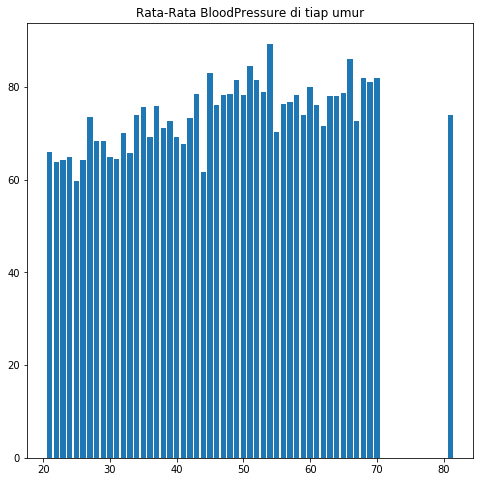

In [7]:
plt.figure(figsize=(8,8))
plt.bar('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

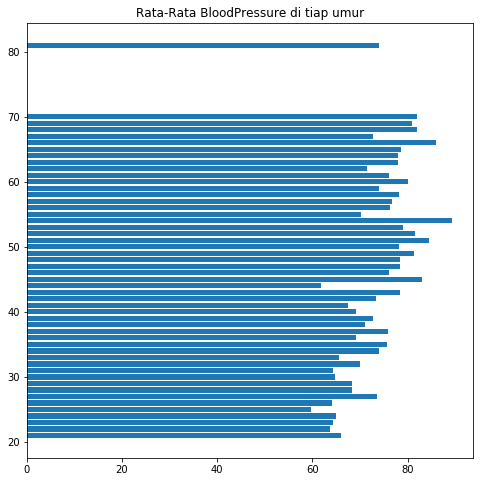

In [8]:
plt.figure(figsize=(8,8))
plt.barh('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

## Line Chart

Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

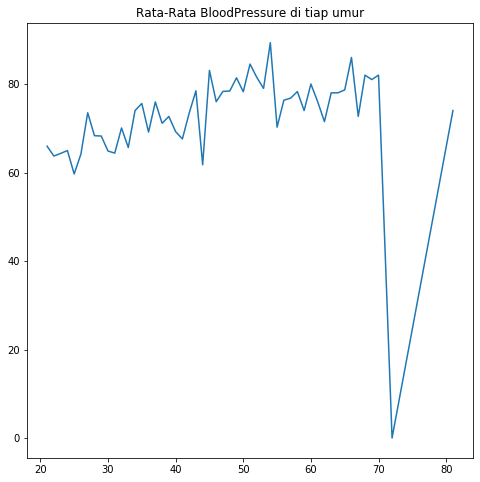

In [9]:
plt.figure(figsize=(8,8))
plt.plot('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

## Scatterplot

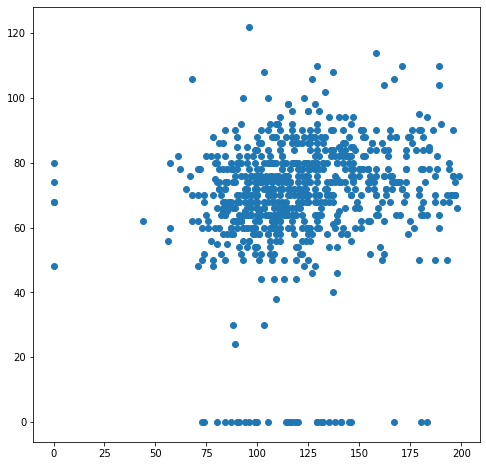

In [10]:
plt.figure(figsize=(8,8))
plt.scatter('Glucose','BloodPressure',data=df)

In [19]:
## Fit Linier Regression Model
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
X = np.array(df.Glucose).reshape((-1,1))
Y = np.array(df.BloodPressure)
fit = model.fit(X,Y)

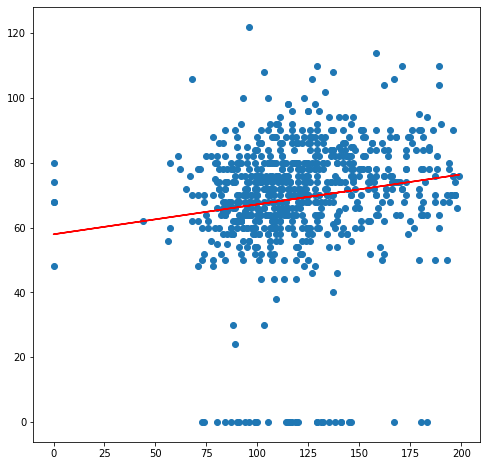

In [20]:
## Add Regresion Line
plt.figure(figsize=(8,8))
plt.scatter('Glucose','BloodPressure',data=df)
plt.plot(X,fit.predict(X),'r')
plt.show()

# Pie Chart

In [21]:
import math

In [22]:
## Membuat kelas berdasarkan aturan sturges
list_age = np.array(list(set(df.Age)))

max_value = max(df.Age)
min_value = min(df.Age)
n = len(df.Age)
K = 1 + 3.3*math.log(n,10)
k = (max_value-min_value)/K

batas_bawah = np.array(range(min_value,max_value,11))
batas_atas = batas_bawah + 10

print('Banyak Kelas:',k)
print('Interval:',K)
print('Batas Atas:',batas_atas)
print('Batas Bawah:',batas_bawah)

Banyak Kelas: 5.70250486814686
Interval: 10.521692026103988
Batas Atas: [31 42 53 64 75 86]
Batas Bawah: [21 32 43 54 65 76]


In [23]:
## Total Individu setiap kelas umur
kelas = []
for k in range(len(list_age)):
    for j in range(len(batas_bawah)):
        if df.Age[k] in list(range(batas_bawah[j],batas_atas[j]+1)):
            kelas.append([str(batas_bawah[j]) + '-' + str(batas_atas[j]),df.Age[k]])
df_kelas = pd.DataFrame(kelas,columns=['kelas','total'])
df_group = df_kelas.groupby('kelas').sum()
df_group.reset_index(inplace=True)
df_group

,kelas,total
0,21-31,617
1,32-42,461
2,43-53,437
3,54-64,397


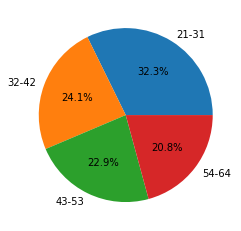

In [24]:
plt.pie('total', labels='kelas', autopct='%1.1f%%',data=df_group)
plt.show()

# Histogram

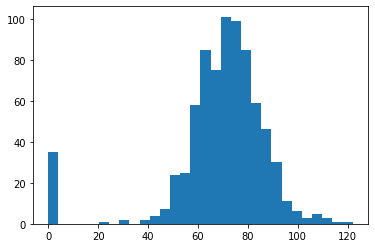

In [25]:
plt.hist(df.BloodPressure,bins=30)
plt.show()

# Heatmap

In [26]:
korelasi = np.array(df.corr())
korelasi = korelasi.round(2)
row = col = df.columns.values.tolist()

<Figure size 720x720 with 0 Axes>

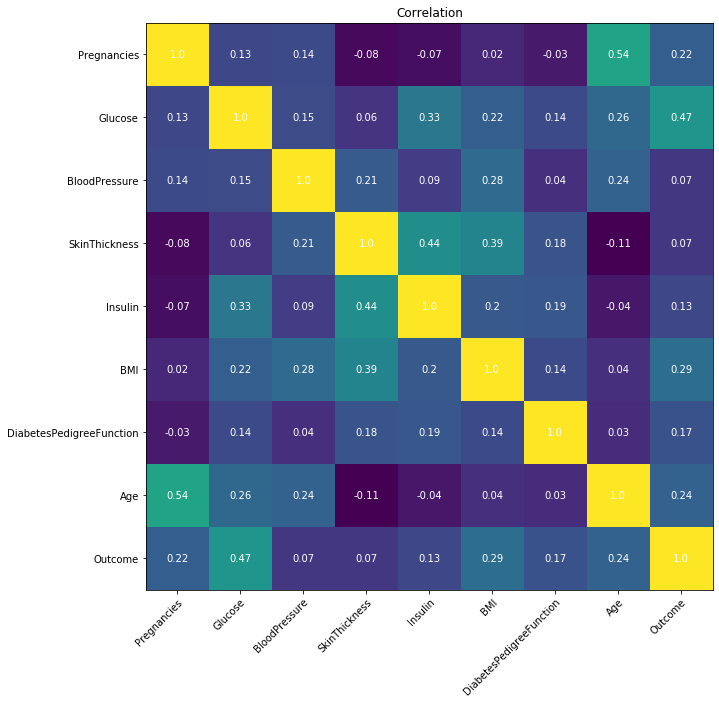

In [27]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(korelasi)

ax.set_xticks(np.arange(len(row)))
ax.set_yticks(np.arange(len(col)))

ax.set_xticklabels(row) # label sumbu x
ax.set_yticklabels(col) # label sumbu y

plt.setp(ax.set_xticklabels(row),rotation=45,ha="right",rotation_mode="anchor")

for k in range(len(row)):
    for j in range(len(col)):
        text = ax.text(k,j,korelasi[k,j],ha="center",va="center",color="w")

ax.set_title("Correlation")
fig.tight_layout()
plt.show()

# Boxplot

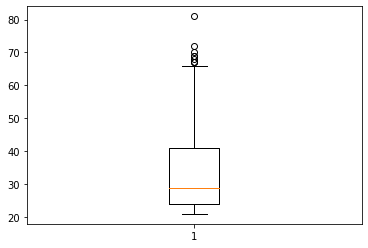

In [28]:
plt.boxplot(df.Age)
plt.show()

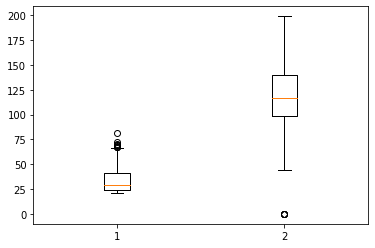

In [29]:
plt.boxplot([df.Age,df.Glucose])
plt.show()

## Refference
1. https://matplotlib.org/
2. https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
3. https://matplotlib.org/3.2.2/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py